In [5]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
import pandas as pd

In [6]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [7]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [8]:
print(f"length of positive tweets : {len(all_positive_tweets)}")
print(f"length of all Negative tweets : {len(all_negative_tweets)}")

length of positive tweets : 5000
length of all Negative tweets : 5000


In [9]:
print(f"type of Positive Tweets :  {type(all_positive_tweets)}")
print(f"type of all negative tweets : {type(all_negative_tweets)}")

type of Positive Tweets :  <class 'list'>
type of all negative tweets : <class 'list'>


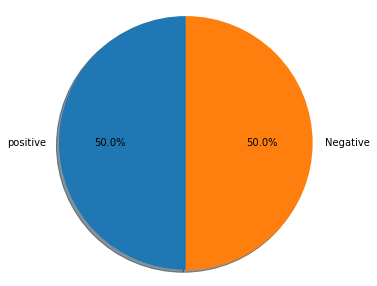

In [10]:
# for representing percentage fo tweets in pie chart

fig = plt.figure(figsize=(5,5))

labels = 'positive' , 'Negative'

sizes = [len(all_positive_tweets), len(all_negative_tweets)]

plt.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.show()



Now we Look at the Raw Data for both Positive and negative tweets

In [11]:
print(f"\033[92m random positive tweets : {all_positive_tweets[random.randint(0,5000)]}")


 random positive tweets : @VikkFollows #StarSquad ⭐ Can I please get a follow? :)


In [12]:
print(f"\033[91m Random Negative Tweets {all_negative_tweets[random.randint(0,5000)]}")

 Random Negative Tweets How careful do you actually have to be with a black box? :(


Now we Do Preprocess the Data.

1. Tokenizing String

2. Lowercasing

3. Removing Stop words

4. Stemming

In [13]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [16]:
print('\033[92m' + tweet)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [17]:
tweet2 = re.sub(r'^RT[\s]+', '', tweet)
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
tweet2 = re.sub(r'#', '', tweet2)

In [18]:
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenize The strings

In [19]:
tokenizer = TweetTokenizer(preserve_case=True, strip_handles=True, reduce_len=True)

tweet_token = tokenizer.tokenize(tweet2)

print(f"tokenized Strings ---------> {tweet_token}")

tokenized Strings ---------> ['My', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'Friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'Friday', 'off', '…']


Remove Stop words and Punctuations

In [20]:
stopwords_english = stopwords.words('english')

print(f"stop words --------->\n{stopwords_english}")

stop words --------->
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', '

In [21]:
print('\nPunctuation---------->\n')
print(string.punctuation)


Punctuation---------->

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
print()
print('\033[92m')
print(tweet_token)
print('\033[94m')

print(len(tweet_token))



['My', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'Friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'Friday', 'off', '…']

16


In [23]:
tweets_clean = []

for word in tweet_token: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation and word not in ':)' and word not in '…'):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)

removed stop words and punctuation:
['My', 'beautiful', 'sunflowers', 'sunny', 'Friday', 'morning', 'sunflowers', 'favourites', 'happy', 'Friday']


Stemming

it is the process of converting words to its most general form

In [24]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')



['My', 'beautiful', 'sunflowers', 'sunny', 'Friday', 'morning', 'sunflowers', 'favourites', 'happy', 'Friday']



In [25]:
stemmer = PorterStemmer()

tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)

print(tweets_stem)

['my', 'beauti', 'sunflow', 'sunni', 'friday', 'morn', 'sunflow', 'favourit', 'happi', 'friday']


Process tweet Function for processing all the tweets

In [30]:
from utils import process_tweet

tweet = all_positive_tweets[2700]


In [31]:
print()
print('\033[92m')
print(tweet)
print('\033[94m')

tweets_stem = process_tweet(tweet)
print('preprocessed tweet:')
print(tweets_stem) # Print the result



5 more days until everyone experiences OS exploits in windows and everyone has to get new computers :)

preprocessed tweet:
['5', 'day', 'everyon', 'experi', 'os', 'exploit', 'window', 'everyon', 'get', 'new', 'comput']
